In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('heart.csv')
# Convert categorical variables to dummy variables
data = pd.get_dummies(data, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

# Normalize the continuous variables
continuous_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[continuous_vars] = (data[continuous_vars] - data[continuous_vars].mean()) / data[continuous_vars].std()
# Split the data into training and testing sets
train_data = data.sample(frac=0.8, random_state=1)
test_data = data.drop(train_data.index)
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.loss=[]
        self.accuracy=[]

        # Initialize weights
        self.weights1 = np.random.randn(self.input_size, self.hidden_size)
       
        self.weights2 = np.random.randn(self.hidden_size, self.output_size)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        self.hidden = self.sigmoid(np.dot(X, self.weights1))
        self.output = self.sigmoid(np.dot(self.hidden, self.weights2))
        return self.output

    def backward(self, X, y, output):
        
        self.output_error = y - output
        self.loss.append(float(abs((y-output)[0])))
        self.accuracy.append(1-float(abs((y-output)[0])))
        self.output_delta = self.output_error * self.sigmoid_derivative(output)

        self.hidden_error = self.output_delta.dot(self.weights2.T)
        self.hidden_delta = self.hidden_error * self.sigmoid_derivative(self.hidden)

        self.weights1 += X.T.dot(self.hidden_delta)
        self.weights2 += self.hidden.T.dot(self.output_delta)

    def train(self, X, y):
        output = self.forward(X)
        self.backward(X, y, output)
        predicted = np.round(output)
        accuracy = np.mean(predicted == y)
        self.accuracy.append(accuracy)
        

# Define the input, hidden, and output sizes
input_size = train_data.shape[1] - 1
hidden_size = 10
output_size = 1


# Initialize the neural network
nn = NeuralNetwork(input_size, hidden_size, output_size)

# Train the neural network
for i in range(5000):
    X = train_data.iloc[:, :-1].values
    y = train_data.iloc[:, -1].values.reshape(-1, 1)
    nn.train(X, y)
# Test the neural network
X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values.reshape(-1, 1)
predictions = nn.forward(X_test)
accuracy = np.mean((predictions > 0.5) == y_test)

print('Accuracy:', accuracy*100)

Accuracy: 98.30508474576271


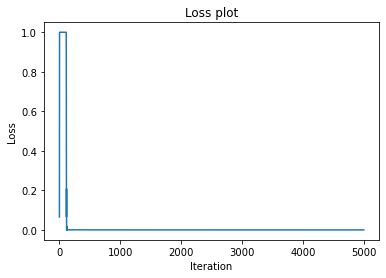

In [8]:
plt.plot(nn.loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss plot')
plt.show()


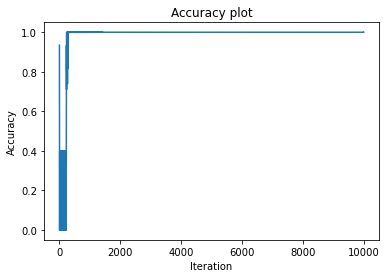

In [9]:
plt.plot(nn.accuracy)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy plot')
plt.show()


In [21]:
import numpy as np
import pandas as pd

class NeuralNetwork:
    def __init__(self, input_size, hidden_sizes, output_size):
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size
        self.loss=[]
        self.accuracy=[]
        self.weights = []

        # Initialize weights
        prev_size = self.input_size
        for size in self.hidden_sizes:
            self.weights.append(np.random.randn(prev_size, size))
            prev_size = size
        self.weights.append(np.random.randn(prev_size, self.output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        self.hidden_layers = []
        hidden = self.sigmoid(np.dot(X, self.weights[0]))
        self.hidden_layers.append(hidden)
        for i in range(1, len(self.weights)-1):
            hidden = self.sigmoid(np.dot(hidden, self.weights[i]))
            self.hidden_layers.append(hidden)
        self.output = self.sigmoid(np.dot(hidden, self.weights[-1]))
        return self.output

    def backward(self, X, y, output):
        error = y - output
        self.loss.append(float(abs(error[0])))
        deltas = [error * self.sigmoid_derivative(output)]
        for i in range(len(self.weights)-2, -1, -1):
            delta = deltas[0].dot(self.weights[i+1].T) * self.sigmoid_derivative(self.hidden_layers[i])
            deltas.insert(0, delta)
        self.weights[0] += X.T.dot(deltas[0])
        for i in range(1, len(self.weights)):
            self.weights[i] += self.hidden_layers[i-1].T.dot(deltas[i])

    def train(self, X, y):
        output = self.forward(X)
        self.backward(X, y, output)
        predicted = np.round(output)
        accuracy = np.mean(predicted == y)
        self.accuracy.append(accuracy)
        


# Load data
data = pd.read_csv('heart.csv')

# Convert categorical variables to dummy variables
data = pd.get_dummies(data, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

# Normalize the continuous variables
continuous_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[continuous_vars] = (data[continuous_vars] - data[continuous_vars].mean()) / data[continuous_vars].std()

# Split the data into training and testing sets
train_data = data.sample(frac=0.8, random_state=10)
test_data = data.drop(train_data.index)
print(train_data.shape,test_data.shape)
# Define the input, hidden, and output sizes
input_size = train_data.shape[1] - 1
hidden_sizes = [5,5,7]
output_size = 1

# Initialize the neural network
nn = NeuralNetwork(input_size, hidden_sizes, output_size)

# Train the neural network
for i in range(1000):
    X = train_data.iloc[:, :-1].values
    y = train_data.iloc[:, -1].values.reshape(-1, 1)
    nn.train(X, y)

# Test the neural network
X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values.reshape(-1, 1)
predictions = nn.forward(X_test)
accuracy = np.mean((predictions > 0.5) == y_test)
print('Accuracy:', accuracy*100)



(238, 29) (59, 29)
Accuracy: 94.91525423728814


In [22]:
data

,age,trestbps,chol,thalach,oldpeak,condition,sex_0,sex_1,cp_0,cp_1,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_0,thal_1,thal_2
0,1.597606,1.593577,-0.256746,-0.810726,-0.819430,0,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
1,1.597606,0.467629,-0.160588,0.061054,0.638393,0,1,0,1,0,...,1,0,0,0,0,1,0,1,0,0
2,1.266105,1.030603,-0.410599,-1.551739,1.324427,0,1,0,1,0,...,0,0,1,1,0,0,0,1,0,0
3,1.155604,0.355034,0.666374,1.063601,0.295376,1,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
4,1.045104,-1.221294,-0.699074,-0.244069,0.638393,0,0,1,1,0,...,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,-1.606907,1.143198,-0.468294,1.368724,-0.905184,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
293,-1.717408,-0.770914,-0.545221,-0.418425,0.123867,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
294,-2.159410,-0.658320,-0.949086,-0.854315,0.466884,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
295,-2.159410,0.355034,-1.237561,1.412313,0.295376,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0


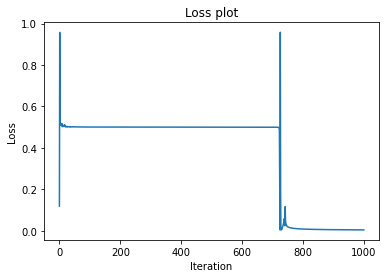

In [23]:
plt.plot(nn.loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss plot')
plt.show()



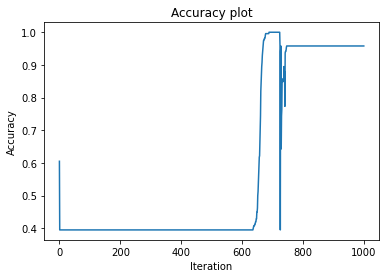

In [24]:
plt.plot(nn.accuracy)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy plot')
plt.show()

# Using Inbuilt library for model creation

In [25]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

# Load the data
data = pd.read_csv('heart.csv')
# Convert categorical variables to dummy variables
data = pd.get_dummies(data, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

# Normalize the continuous variables
continuous_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[continuous_vars] = (data[continuous_vars] - data[continuous_vars].mean()) / data[continuous_vars].std()

# Split the data into training and testing sets
train_data = data.sample(frac=0.8, random_state=1)
test_data = data.drop(train_data.index)

# Define the input size
input_size = train_data.shape[1] - 1

# Prompt user to input the output size
output_size = int(input("Enter output size: "))

# Create the model
model = Sequential()
model.add(Dense(16, input_dim=input_size, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(16, input_dim=input_size, activation='relu'))

model.add(Dense(output_size, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Prompt user to input the number of epochs and batch size
epochs = int(input("Enter number of epochs: "))
batch_size = int(input("Enter batch size: "))

# Train the model
X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values.reshape(-1, 1)

X_test  = test_data.iloc[:,:-1].values
y_test  = test_data.iloc[:,-1].values.reshape(-1,1)
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

# Example inputs:
# Enter output size: 1
# Enter number of epochs: 100
# Enter batch size: 32

Epoch 1/50
8/8 [==============================] - 1s 3ms/step - loss: 0.6985 - accuracy: 0.5168
Epoch 2/50
8/8 [==============================] - 0s 3ms/step - loss: 0.6887 - accuracy: 0.6176
Epoch 3/50
8/8 [==============================] - 0s 4ms/step - loss: 0.6789 - accuracy: 0.6933
Epoch 4/50
8/8 [==============================] - 0s 5ms/step - loss: 0.6689 - accuracy: 0.7311
Epoch 5/50
8/8 [==============================] - 0s 4ms/step - loss: 0.6575 - accuracy: 0.7773
Epoch 6/50
8/8 [==============================] - 0s 3ms/step - loss: 0.6441 - accuracy: 0.7899
Epoch 7/50
8/8 [==============================] - 0s 3ms/step - loss: 0.6288 - accuracy: 0.7941
Epoch 8/50
8/8 [==============================] - 0s 4ms/step - loss: 0.6112 - accuracy: 0.8025
Epoch 9/50
8/8 [==============================] - 0s 3ms/step - loss: 0.5907 - accuracy: 0.8109
Epoch 10/50
8/8 [==============================] - 0s 2ms/step - loss: 0.5684 - accuracy: 0.8151
Epoch 11/50
8/8 [======================

In [26]:
y_train_pred_float=model.predict(X_train)
y_test_pred_float =model.predict(X_test)


2/2 [==============================] - 0s 4ms/step


In [27]:
from sklearn.metrics import accuracy_score


Training Accuracy

In [28]:


y_train
y_train_pred=[]
for i in y_train_pred_float:
    if(i>=0.5):
        y_train_pred.append(1)
    else:
        y_train_pred.append(0)



# Calculate the accuracy of the model on the training and testing sets
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy:.4f}')


Training Accuracy: 1.0000


In [29]:


y_test
y_test_pred=[]
for i in y_test_pred_float:
    if(i>=0.5):
        y_test_pred.append(1)
    else:
        y_test_pred.append(0)



# Calculate the accuracy of the model on the training and testing sets
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {test_accuracy:.4f}')

Training Accuracy: 0.9661


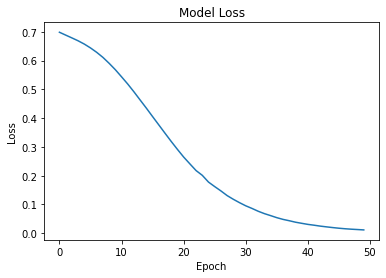

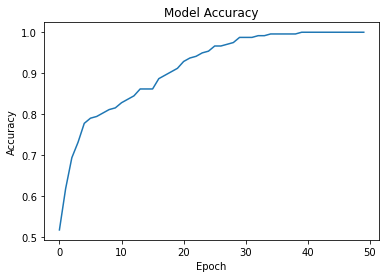

In [30]:
# Plot the loss and accuracy over epochs
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [4]:
    print(i)

10
9
8
7
6
5
4
3
2
1
0
